In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

# 원본데이터 분할하기

In [26]:
# 원본 데이터 가져오기
# 컬럼을 추출하기 위해 일단 0행만 가져오기

df = pd.read_csv("business_data/2019-Oct.csv", nrows=1)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c


In [23]:
# 컬름을 cols 변수에 담기

cols = df.columns.to_list()

In [24]:
# 나의 담당인 28,299,176행 ~ 35373969행만 가져오기

ec = pd.read_csv("business_data/2019-Oct.csv", skiprows=28299176, nrows=7074794, names=cols)
ec.shape

(7074794, 9)

In [25]:
ec.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 09:13:19 UTC,view,1005073,2053013555631882655,electronics.smartphone,samsung,1137.17,512403746,93ffa157-f310-4b84-ae13-a7b69549b256
1,2019-10-21 09:13:19 UTC,view,1480758,2053013561092866779,computers.desktop,pulser,1039.90,562188068,f9a52b97-2c68-4b06-85dd-426efc15d21f
2,2019-10-21 09:13:19 UTC,view,1004945,2053013555631882655,electronics.smartphone,samsung,965.02,515000025,89564d37-a7a5-49c1-80e3-0b63fa7ff2b1
3,2019-10-21 09:13:19 UTC,view,4804572,2053013554658804075,electronics.audio.headphone,apple,208.50,513085039,d1cd0711-8cdf-4b05-8bd5-ce5c1d1505b1
4,2019-10-21 09:13:19 UTC,view,12710977,2053013553559896355,NaN,powertrac,32.95,512950097,33b1dd82-7e00-43be-a8db-71c8b4335ec0
5,2019-10-21 09:13:19 UTC,view,28719620,2053013565882762215,NaN,baden,71.82,517347511,1268c141-4dfb-44b5-a342-cf96c366e3b9
6,2019-10-21 09:13:19 UTC,view,21401209,2053013561579406073,electronics.clocks,casio,70.26,541487126,36973919-4e51-442f-99d1-7cacb338aec8
7,2019-10-21 09:13:19 UTC,view,1004241,2053013555631882655,electronics.smartphone,apple,1158.31,515018462,2a1f1e59-d25c-4a0e-b495-4675fef06724
8,2019-10-21 09:13:19 UTC,view,4804541,2053013554658804075,electronics.audio.headphone,ritmix,1.13,546680777,641cb81a-3573-4296-a3bb-2673eb28f257
9,2019-10-21 09:13:19 UTC,view,3601437,2053013563810775923,appliances.kitchen.washer,lg,437.33,539713956,170a8ae5-b463-4e9e-a159-a7b4f6e3b577


# parquet으로 저장하기

In [27]:
# parquet 형식으로 저장
ec.to_parquet("ec.parquet.gzip", compression="gzip")

# parquet 파일 불러오기

In [23]:
# 잘 저장되고 잘 불러와지는지 확인
df = pd.read_parquet("ec.parquet.gzip")
df.shape

(7074794, 9)

In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 09:13:19 UTC,view,1005073,2053013555631882655,electronics.smartphone,samsung,1137.17,512403746,93ffa157-f310-4b84-ae13-a7b69549b256
1,2019-10-21 09:13:19 UTC,view,1480758,2053013561092866779,computers.desktop,pulser,1039.90,562188068,f9a52b97-2c68-4b06-85dd-426efc15d21f
2,2019-10-21 09:13:19 UTC,view,1004945,2053013555631882655,electronics.smartphone,samsung,965.02,515000025,89564d37-a7a5-49c1-80e3-0b63fa7ff2b1
3,2019-10-21 09:13:19 UTC,view,4804572,2053013554658804075,electronics.audio.headphone,apple,208.50,513085039,d1cd0711-8cdf-4b05-8bd5-ce5c1d1505b1
4,2019-10-21 09:13:19 UTC,view,12710977,2053013553559896355,None,powertrac,32.95,512950097,33b1dd82-7e00-43be-a8db-71c8b4335ec0


## 데이터 탐색

In [5]:
# 데이터 기본 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074794 entries, 0 to 7074793
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 485.8+ MB


In [6]:
# 유일값 확인

df.nunique()

event_time        428197
event_type             3
product_id        121747
category_id          598
category_code        125
brand               3005
price              32627
user_id           860505
user_session     1568864
dtype: int64

In [7]:
# 결측치 비율 확인

df.isnull().mean()

event_time       0.000000e+00
event_type       0.000000e+00
product_id       0.000000e+00
category_id      0.000000e+00
category_code    3.090742e-01
brand            1.434346e-01
price            0.000000e+00
user_id          0.000000e+00
user_session     1.413469e-07
dtype: float64

In [8]:
# event_type 종류 확인

df["event_type"].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [11]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-21 09:13:19 UTC,view,1005073,2053013555631882655,electronics.smartphone,samsung,1137.17,512403746,93ffa157-f310-4b84-ae13-a7b69549b256
1,2019-10-21 09:13:19 UTC,view,1480758,2053013561092866779,computers.desktop,pulser,1039.90,562188068,f9a52b97-2c68-4b06-85dd-426efc15d21f
2,2019-10-21 09:13:19 UTC,view,1004945,2053013555631882655,electronics.smartphone,samsung,965.02,515000025,89564d37-a7a5-49c1-80e3-0b63fa7ff2b1
3,2019-10-21 09:13:19 UTC,view,4804572,2053013554658804075,electronics.audio.headphone,apple,208.50,513085039,d1cd0711-8cdf-4b05-8bd5-ce5c1d1505b1
4,2019-10-21 09:13:19 UTC,view,12710977,2053013553559896355,None,powertrac,32.95,512950097,33b1dd82-7e00-43be-a8db-71c8b4335ec0


## 불필요한 컬럼 삭제

In [24]:
# user_session 컬럼 삭제

df = df.drop(columns=["user_session"]).copy()
df.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-21 09:13:19 UTC,view,1005073,2053013555631882655,electronics.smartphone,samsung,1137.17,512403746
1,2019-10-21 09:13:19 UTC,view,1480758,2053013561092866779,computers.desktop,pulser,1039.90,562188068


## 데이터타입 변경 및 downcast

In [25]:
# event_time 컬럼 데이터 타입 변경
# object -> datetime

df["event_time"] = pd.to_datetime(df["event_time"])

In [13]:
df.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
dtype: object

In [23]:
# 숫자형 데이터의 최솟값이 모두 0이상

df[["product_id", "category_id", "price", "user_id"]].min()

product_id     1.000978e+06
category_id    2.053014e+18
price          0.000000e+00
user_id        3.386938e+07
dtype: float64

In [26]:
# int -> unsigned로 변경

df["product_id"] = pd.to_numeric(df["product_id"], downcast="unsigned")
df["category_id"] = pd.to_numeric(df["category_id"], downcast="unsigned")
df["user_id"] = pd.to_numeric(df["user_id"], downcast="unsigned")
df.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                    uint32
category_id                   uint64
category_code                 object
brand                         object
price                        float64
user_id                       uint32
dtype: object

In [27]:
# float도 downcast
df["price"] = pd.to_numeric(df["price"], downcast="float")

In [16]:
df.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                    uint32
category_id                   uint64
category_code                 object
brand                         object
price                        float32
user_id                       uint32
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074794 entries, 0 to 7074793
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     uint32             
 3   category_id    uint64             
 4   category_code  object             
 5   brand          object             
 6   price          float32            
 7   user_id        uint32             
dtypes: datetime64[ns, UTC](1), float32(1), object(3), uint32(2), uint64(1)
memory usage: 350.8+ MB


In [28]:
# object -> category로 변경

df["category_code"] = df["category_code"].astype("category")
df["event_type"] = df["event_type"].astype("category")
df["brand"] = df["brand"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074794 entries, 0 to 7074793
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     category           
 2   product_id     uint32             
 3   category_id    uint64             
 4   category_code  category           
 5   brand          category           
 6   price          float32            
 7   user_id        uint32             
dtypes: category(3), datetime64[ns, UTC](1), float32(1), uint32(2), uint64(1)
memory usage: 216.0 MB


In [29]:
# 전처리를 한 데이터프레임을 parquet형식으로 저장

df.to_parquet("df.parquet.choseyeon.gzip", compression="gzip")

# 팀 통합 데이터 파일 불러오기

In [35]:
raw = pd.read_parquet("business_data/df_final.parquet.gzip")
raw.shape

(42448763, 8)

## 결측치 삭제

In [37]:
raw = raw.dropna().copy()
raw

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-16 12:04:37+00:00,view,7900918,2053013556487520725,furniture.kitchen.chair,joie,102.709999,560842110
1,2019-10-16 12:04:37+00:00,view,1003317,2053013555631882655,electronics.smartphone,apple,952.150024,560842739
2,2019-10-16 12:04:37+00:00,view,2501929,2053013564003713919,appliances.kitchen.oven,asel,61.750000,525817175
3,2019-10-16 12:04:37+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,172.169998,515456548
4,2019-10-16 12:04:37+00:00,cart,1004836,2053013555631882655,electronics.smartphone,samsung,229.410004,529758564
...,...,...,...,...,...,...,...,...
7074788,2019-10-11 17:54:47+00:00,view,3601261,2053013563810775923,appliances.kitchen.washer,bosch,476.119995,515598105
7074789,2019-10-11 17:54:47+00:00,view,2800660,2053013563835941749,appliances.kitchen.refrigerators,dauscher,156.220001,557716137
7074791,2019-10-11 17:54:47+00:00,view,4900396,2053013555220840837,appliances.kitchen.juicer,bosch,101.389999,522609644
7074792,2019-10-11 17:54:47+00:00,view,1801350,2053013554415534427,electronics.video.tv,toshiba,437.510010,505550850


## 중복값 삭제

In [38]:
raw = raw.drop_duplicates().copy()
raw

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-16 12:04:37+00:00,view,7900918,2053013556487520725,furniture.kitchen.chair,joie,102.709999,560842110
1,2019-10-16 12:04:37+00:00,view,1003317,2053013555631882655,electronics.smartphone,apple,952.150024,560842739
2,2019-10-16 12:04:37+00:00,view,2501929,2053013564003713919,appliances.kitchen.oven,asel,61.750000,525817175
3,2019-10-16 12:04:37+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,172.169998,515456548
4,2019-10-16 12:04:37+00:00,cart,1004836,2053013555631882655,electronics.smartphone,samsung,229.410004,529758564
...,...,...,...,...,...,...,...,...
7074788,2019-10-11 17:54:47+00:00,view,3601261,2053013563810775923,appliances.kitchen.washer,bosch,476.119995,515598105
7074789,2019-10-11 17:54:47+00:00,view,2800660,2053013563835941749,appliances.kitchen.refrigerators,dauscher,156.220001,557716137
7074791,2019-10-11 17:54:47+00:00,view,4900396,2053013555220840837,appliances.kitchen.juicer,bosch,101.389999,522609644
7074792,2019-10-11 17:54:47+00:00,view,1801350,2053013554415534427,electronics.video.tv,toshiba,437.510010,505550850


# 샘플 데이터 불러오기
- 샘플데이터 : 용이한 코드 작성을 위해 1백만행만 슬라이싱한 데이터

In [2]:
sample = pd.read_parquet("business_data/df.sample.parquet.gzip")
sample.shape, sample.dtypes

((1000000, 8),
 event_time       datetime64[ns, UTC]
 event_type                  category
 product_id                     int64
 category_id                   uint64
 category_code                 object
 brand                         object
 price                        float32
 user_id                        int64
 dtype: object)

In [3]:
sample.head(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
6733995,2019-10-06 08:34:28+00:00,view,16700605,2053013559901684381,furniture.kitchen.chair,zeta,16.190001,518195082


In [45]:
# sample 데이터의 기술통계값
# price의 이상치 발견

sample.describe()

,product_id,category_id,price,user_id
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
mean,5.389488e+06,2.055721e+18,352.464996,5.341048e+08
std,8.388163e+06,1.568811e+16,380.233673,1.868646e+07
min,1.000978e+06,2.053014e+18,0.000000,2.398766e+08
25%,1.004856e+06,2.053014e+18,109.080002,5.160311e+08
50%,1.500348e+06,2.053014e+18,218.490005,5.308024e+08
75%,5.100337e+06,2.053014e+18,459.070007,5.524060e+08
max,6.050001e+07,2.173217e+18,2574.070068,5.662804e+08


<AxesSubplot: >

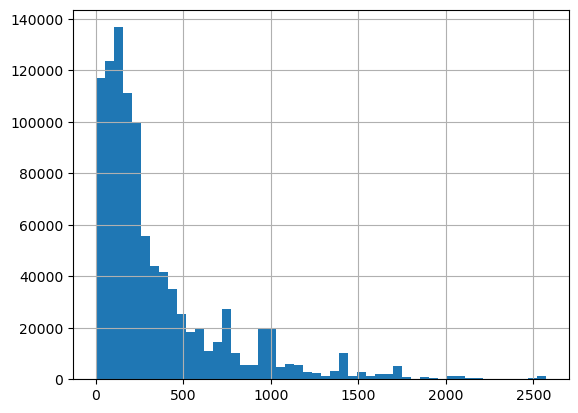

In [46]:
# price의 이상치 확인 1

sample["price"].hist(bins=50)

<AxesSubplot: xlabel='price'>

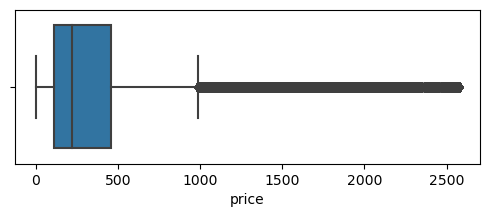

In [47]:
# price의 이상치 확인 2

plt.figure(figsize=(6,2))
sns.boxplot(data=sample, x="price")

In [49]:
# price가 아주 높은 category_code는 주로 전자제품, 컴퓨터
# 어떻게 처리할지는 나중에 의논.

sample[sample["price"] > 2500]["category_code"].value_counts()

computers.notebook                   331
electronics.video.tv                 330
computers.desktop                    228
electronics.clocks                   210
sport.bicycle                         95
appliances.kitchen.coffee_machine     47
electronics.tablet                    38
appliances.kitchen.refrigerators      30
appliances.kitchen.oven               17
construction.tools.drill              16
electronics.camera.photo               7
appliances.sewing_machine              7
construction.tools.generator           6
appliances.kitchen.hood                3
furniture.universal.light              2
construction.tools.pump                2
construction.tools.saw                 2
construction.components.faucet         1
appliances.kitchen.steam_cooker        1
Name: category_code, dtype: int64

## 구매한 내역만 불러오기
- RFM 분석은 구매까지 진행한 고객을 대상으로 하는 분석이므로 구매고객만 추출

In [4]:
df_p = sample[sample["event_type"] == "purchase"].copy()
df_p

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
3426987,2019-10-23 16:38:27+00:00,purchase,1005204,2053013555631882655,electronics.smartphone,xiaomi,156.470001,512564650
3995206,2019-10-09 14:25:09+00:00,purchase,1005118,2053013555631882655,electronics.smartphone,apple,1015.200012,512736880
4641753,2019-10-10 04:55:02+00:00,purchase,1003316,2053013555631882655,electronics.smartphone,apple,931.789978,526929354
1203259,2019-10-17 08:44:34+00:00,purchase,1004903,2053013555631882655,electronics.smartphone,huawei,111.699997,552848662
2321640,2019-10-22 21:51:18+00:00,purchase,1002544,2053013555631882655,electronics.smartphone,apple,458.700012,516355074
...,...,...,...,...,...,...,...,...
6725651,2019-10-21 04:03:20+00:00,purchase,5000065,2053013566100866035,appliances.sewing_machine,janome,209.259995,540473225
4296173,2019-10-04 12:15:19+00:00,purchase,1307071,2053013558920217191,computers.notebook,acer,643.260010,512650236
982552,2019-10-17 05:54:59+00:00,purchase,1004250,2053013555631882655,electronics.smartphone,apple,798.229980,541860636
4248098,2019-10-24 10:13:20+00:00,purchase,1005105,2053013555631882655,electronics.smartphone,apple,1397.089966,513183786


# RFM 계산

## 전체 주문에서 최근 주문일 구하기

In [5]:
last_timestamp = df_p["event_time"].max() + dt.timedelta(days=1)
df_p["event_time"].max(), last_timestamp

(Timestamp('2019-10-31 23:49:19+0000', tz='UTC'),
 Timestamp('2019-11-01 23:49:19+0000', tz='UTC'))

## 고객별 R, F, M 값 구하기

In [6]:
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액

rfm = df_p.groupby("user_id").agg({"event_time": lambda x : (last_timestamp - x.max()).days,
                                  "product_id":"count",
                                  "price":"sum"})
rfm

,event_time,product_id,price
user_id,,,
435648894,26,1,388.130005
437371552,30,1,179.139999
450756413,29,1,43.730000
456810531,7,1,133.350006
473668240,23,1,149.039993
...,...,...,...
566188229,1,1,221.339996
566210490,1,1,514.780029
566227458,1,1,465.910004


In [8]:
# RFM 컬럼명 변경

rfm.columns = ["Recency", "Frequency", "MonetaryValue"]
rfm

,Recency,Frequency,MonetaryValue
user_id,,,
435648894,26,1,388.130005
437371552,30,1,179.139999
450756413,29,1,43.730000
456810531,7,1,133.350006
473668240,23,1,149.039993
...,...,...,...
566188229,1,1,221.339996
566210490,1,1,514.780029
566227458,1,1,465.910004


In [36]:
# R(최근 거래일 기준 고객별 최근 구매한 날짜와 차이값) 빈도수

rfm["Recency"].value_counts().sort_index()

1     686
2     670
3     680
4     671
5     796
6     743
7     732
8     743
9     773
10    770
11    813
12    767
13    745
14    762
15    818
16    415
21    708
22    645
23    636
24    605
25    615
26    658
27    737
28    784
29    567
30    603
31    542
Name: Recency, dtype: int64

<AxesSubplot: xlabel='Recency', ylabel='count'>

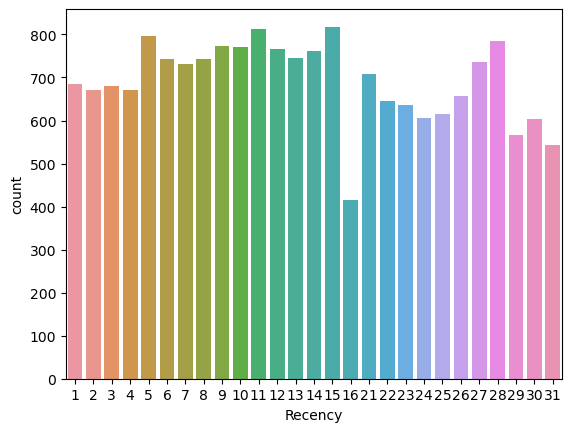

In [34]:
# R(최근 거래일 기준 고객별 최근 구매한 날짜와 차이값) 시각화
# 특이하게도 R값이 비교적 골고루 분포함

sns.countplot(data=rfm, x="Recency")

In [26]:
# 구매 횟수별 빈도수

rfm["product_id"].value_counts().sort_index()

1     17275
2      1121
3       182
4        66
5        17
6        15
7         2
8         2
10        2
12        2
Name: product_id, dtype: int64

<AxesSubplot: xlabel='Frequency', ylabel='count'>

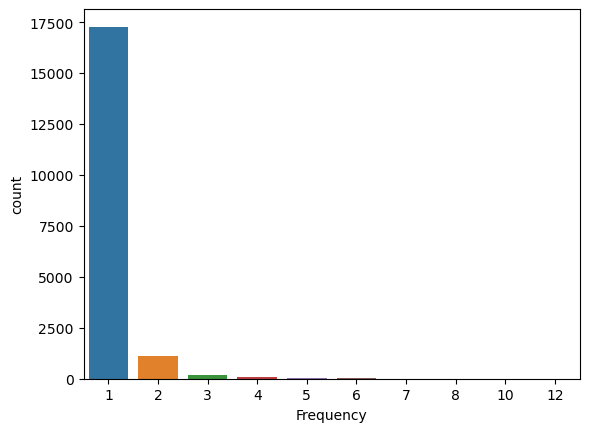

In [37]:
# 구매 횟수별 빈도수 시각화
# 1번 구매한 고객이 압도적으로 많음

sns.countplot(data=rfm, x="Frequency")

# RFM 모형

## qcut을 통해 RFM 변수 만들기

In [9]:
# F, M은 값이 클수록 높은 점수

list(range(1, 6))

[1, 2, 3, 4, 5]

In [10]:
# R은 값이 작을수록 높은 점수

list(range(1, 6))[::-1]

[5, 4, 3, 2, 1]

In [11]:
# Recency 는 최근일수록(값이 작을수록) 높은 점수
# Frequency, MonetaryValue 는 값이 클수록 높은 점수
r_labels = list(range(1, 6))[::-1]
f_labels = list(range(1, 6))
m_labels = list(range(1, 6))
cut_size = 5

In [59]:
# Frequency에 1이라는 같은 값이 너무 많음 -> 제대로 구간을 나눌 수 없어 오류 발생

# r_cut = pd.qcut(x=rfm["Recency"], q=cut_size, labels=r_labels)
# f_cut = pd.qcut(rfm["Frequency"], cut_size, f_labels)
# m_cut = pd.qcut(rfm["MonetaryValue"], cut_size, m_labels)

ValueError: Bin edges must be unique: array([ 1.,  1.,  1.,  1.,  1., 12.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [21]:
# 모든 데이터에 rank()함수를 사용하여 순위를 부여한 후
# 고유한 순위를 기준으로 같은 값이라도 구간별로 할당하는 방식 구현
# 참고 : https://medium.datadriveninvestor.com/valueerror-bin-edges-must-be-unique-71512ff2257d

r_cut = pd.qcut(rfm['Recency'].rank(method="first"), cut_size, r_labels)
f_cut = pd.qcut(rfm['Frequency'].rank(method="first"), cut_size, f_labels)
m_cut = pd.qcut(rfm['MonetaryValue'].rank(method="first"), cut_size, m_labels)

In [22]:
# R, F, M이라는 새로운 컬럼 생성

rfm = rfm.assign(R=r_cut, F=f_cut, M=m_cut)
rfm

,Recency,Frequency,MonetaryValue,R,F,M
user_id,,,,,,
435648894,26,1,388.130005,2,1,4
437371552,30,1,179.139999,1,1,2
450756413,29,1,43.730000,1,1,1
456810531,7,1,133.350006,4,1,2
473668240,23,1,149.039993,2,1,2
...,...,...,...,...,...,...
566188229,1,1,221.339996,5,5,3
566210490,1,1,514.780029,5,5,4
566227458,1,1,465.910004,5,5,4


## RFM Segment

In [23]:
# R, F, M 문자를 그대로 붙여 RFM Segment 만들기

rfm["RFM_segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm.head(1)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
user_id,,,,,,,
435648894,26,1,388.130005,2,1,4,214


## RFM Score

In [24]:
# R, F, M 값의 합계로 Score 구하기
rfm["RFM_score"] = rfm[["R", "F", "M"]].sum(axis=1)
rfm.head(1)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
user_id,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7


<AxesSubplot: xlabel='RFM_segment', ylabel='RFM_score'>

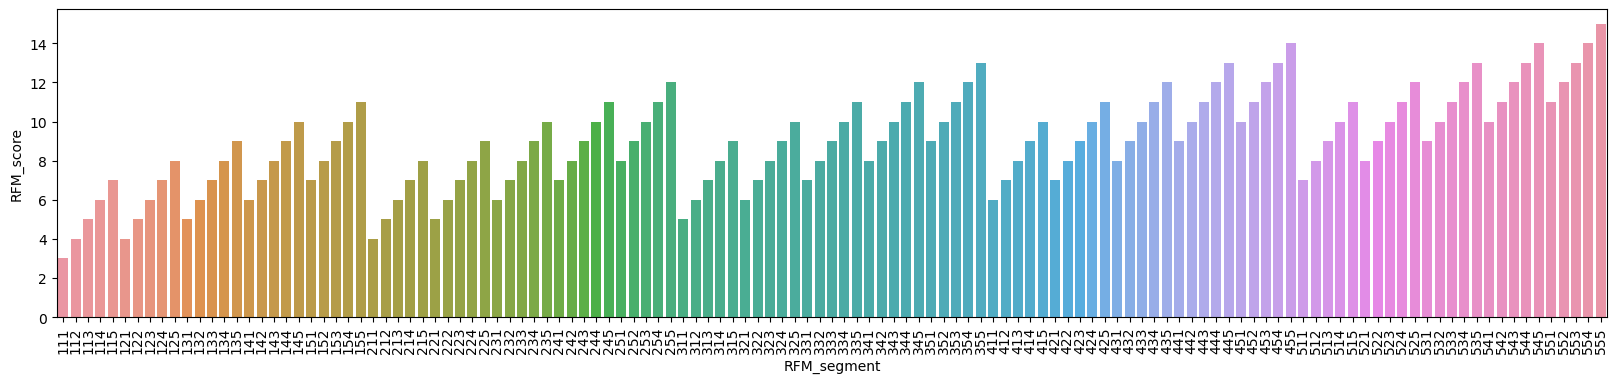

In [25]:
# RFM segment 값에 따라 RFM score 확인
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values("RFM_segment"), x="RFM_segment", y="RFM_score")

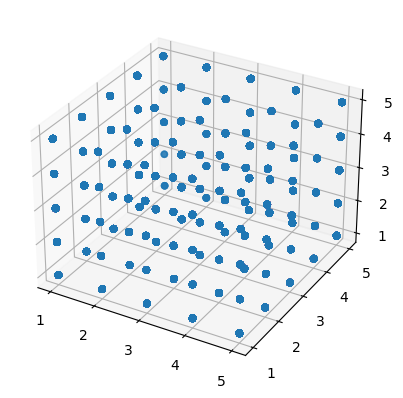

In [26]:
# 구간화가 잘 되었는지 3D로 확인
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["R"], rfm["F"], rfm["M"])

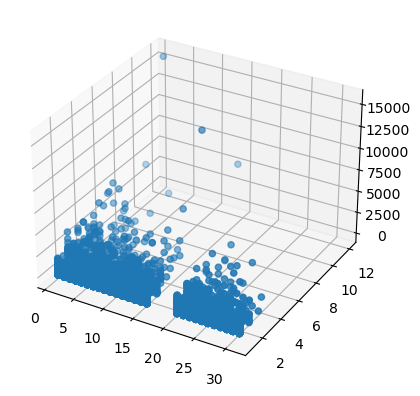

In [27]:
# 구간화 하지 않았을 때와 비교
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"])

In [28]:
# RFM score를 기준으로 Recency, Frequency, MonetaryValue 집계값 확인
# RFM score가 10, 11인 경우 MonetaryValue가 가장 높은 것을 확인 -> why? 단지 이 샘플 데이터셋에서만 그런걸수도..

rfm_g = rfm.groupby("RFM_score").agg({"Recency":"mean",
                                      "Frequency":"mean",
                                      "MonetaryValue":["mean", "sum"]
                                     }).style.background_gradient().format("{:,.0f}")
rfm_g

## silver, gold, platinum으로 고객군 나누기

In [29]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 고객군을 나눕니다. 

labels = ["silver", "gold", "platinum"]
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], 3, labels)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
435648894,26,1,388.130005,2,1,4,214,7,silver
437371552,30,1,179.139999,1,1,2,112,4,silver
450756413,29,1,43.730000,1,1,1,111,3,silver
456810531,7,1,133.350006,4,1,2,412,7,silver
473668240,23,1,149.039993,2,1,2,212,5,silver


In [30]:
# RFM_score에 따라 RFM_class 값이 잘 나뉘었는지 확인. min-max 확인.
# gold보다 platinum이 더 많음.

rfm.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,8366.0,6.608535,1.308346,3.0,6.0,7.0,8.0,8.0
gold,4870.0,9.486448,0.499868,9.0,9.0,9.0,10.0,10.0
platinum,5448.0,12.237518,1.248803,11.0,11.0,12.0,13.0,15.0


<AxesSubplot: xlabel='RFM_class', ylabel='RFM_score'>

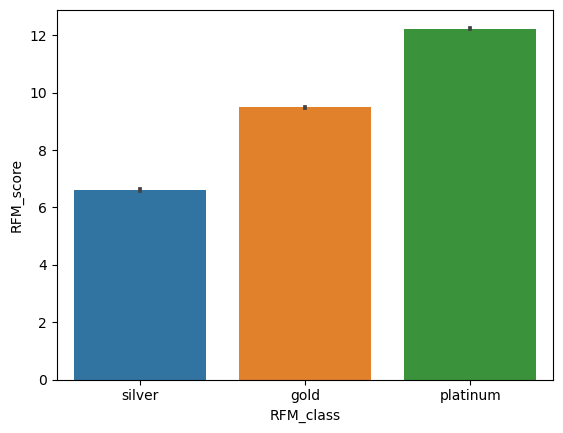

In [31]:
# RFM_class 별 평균 RFM_score 확인(default : 평균)
# barplot

sns.barplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot: xlabel='RFM_class', ylabel='RFM_score'>

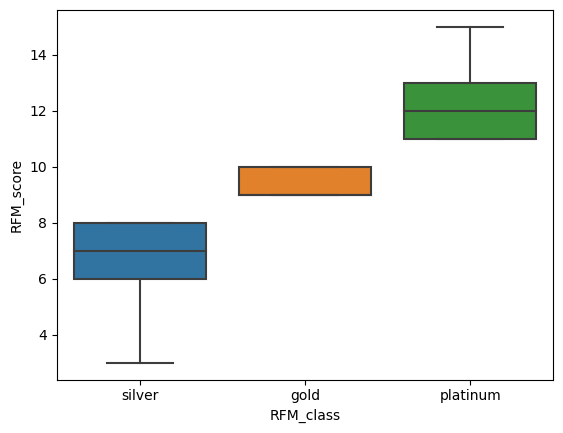

In [32]:
# 같은 내용을 boxplot으로 확인

sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot: xlabel='R', ylabel='RFM_score'>

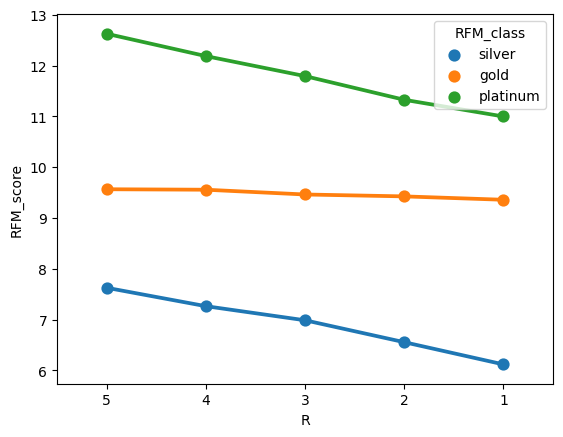

In [33]:
# R을 기준으로 RFM_class가 잘 나뉘어졌는지 확인

sns.pointplot(data=rfm, x="R", y="RFM_score", hue="RFM_class")

<AxesSubplot: xlabel='F', ylabel='RFM_score'>

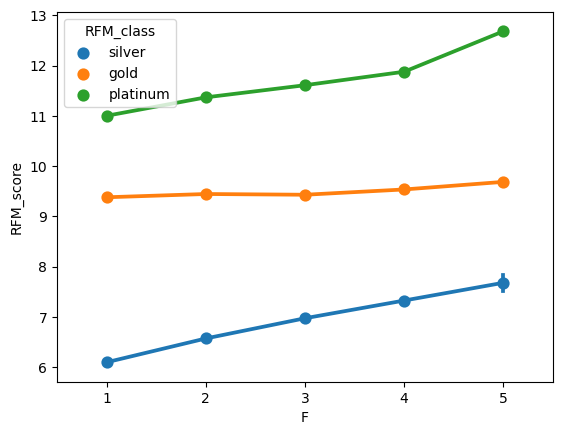

In [34]:
# F을 기준으로 RFM_class가 잘 나뉘어졌는지 확인

sns.pointplot(data=rfm, x="F", y="RFM_score", hue="RFM_class")

<AxesSubplot: xlabel='M', ylabel='RFM_score'>

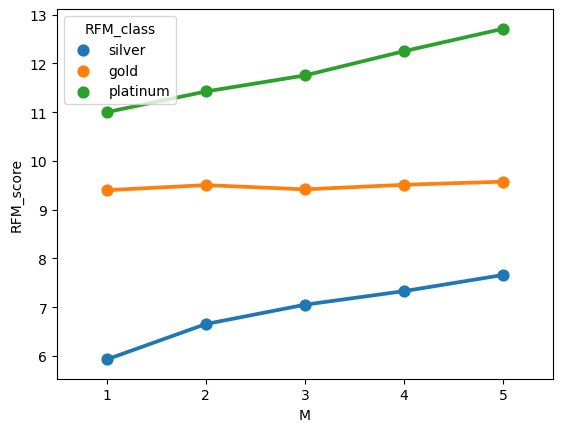

In [35]:
# M을 기준으로 RFM_class가 잘 나뉘어졌는지 확인

sns.pointplot(data=rfm, x="M", y="RFM_score", hue="RFM_class")

In [39]:
# "RFM_class"를 기준으로 Recency, Frequency, MonetaryValue 확인

rfm_class_g = rfm.groupby("RFM_class").agg({"Recency":"mean",
                                            "Frequency":"mean",
                                            "MonetaryValue":["mean", "sum", "count"]})
rfm_class_g.style.background_gradient().format("{:,.2f}")

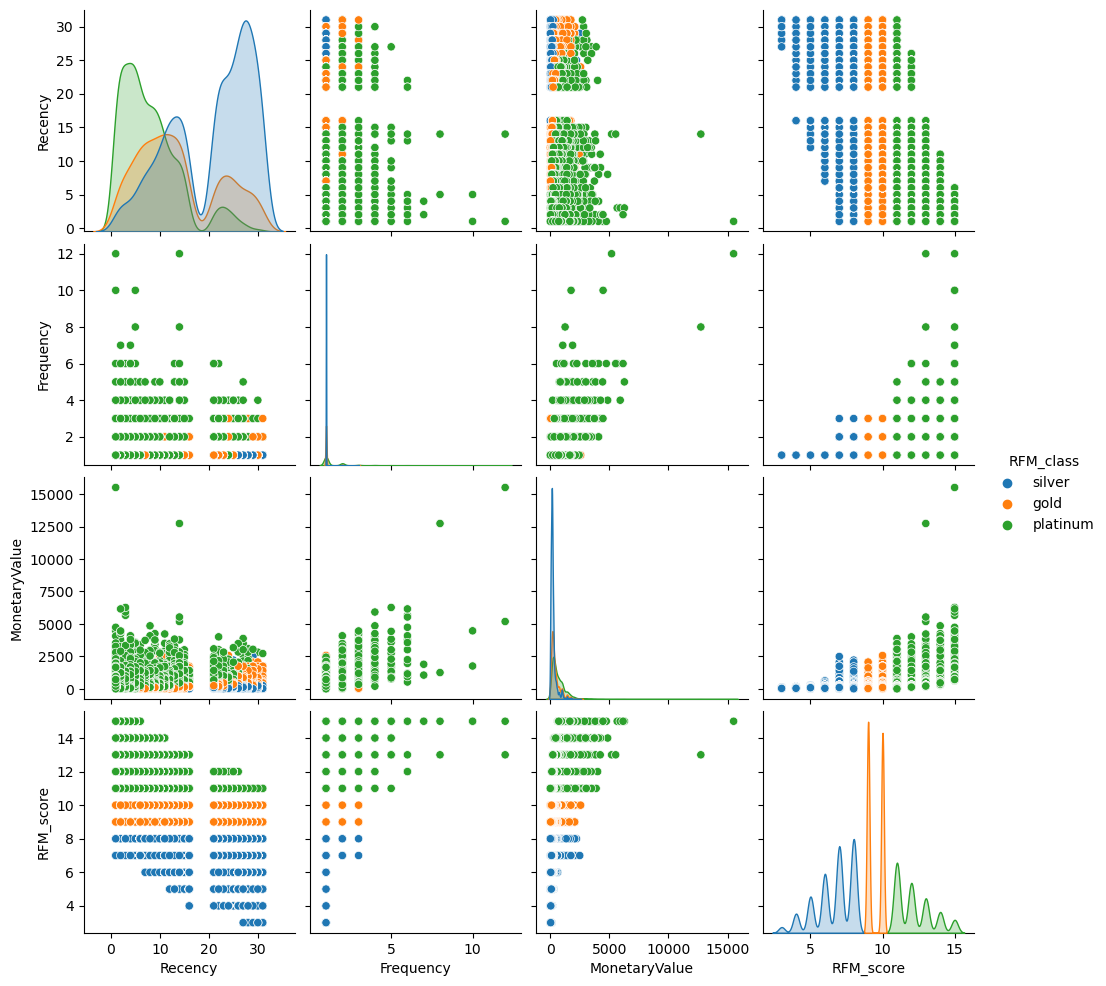

In [40]:
# pairplot으로 "RFM_class" 별로 분포 시각화

sns.pairplot(data=rfm, hue="RFM_class")

In [41]:
# 상관관계 분석

rfm_corr = rfm.corr(numeric_only=True)
rfm_corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.095449,-0.054167,-0.619715
Frequency,-0.095449,1.000000,0.463629,0.351785
MonetaryValue,-0.054167,0.463629,1.000000,0.478380
RFM_score,-0.619715,0.351785,0.478380,1.000000


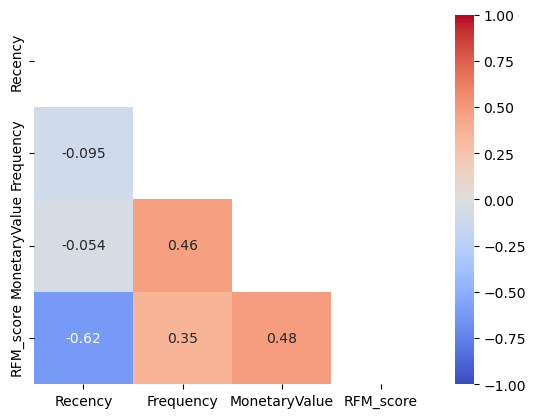

In [42]:
# 히트맵 그리기

mask = np.triu(np.ones_like(rfm_corr))
sns.heatmap(rfm_corr, cmap="coolwarm", annot=True, vmin=-1, vmax=1, mask=mask);

In [ ]:
# RFM 분석 자료를 csv 로 저장합니다.
# rfm.to_csv("data/mini_rfm.csv")

In [ ]:
# 저장된 csv 형태의 RFM 분석 자료를 읽어옵니다. 
# pd.read_csv("data/mini_rfm.csv")